In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
# Загрузка данных
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [5]:
# Создание DataFrame
df = pd.DataFrame(X, columns=iris.feature_names)
df['species'] = pd.Categorical.from_codes(y, iris.target_names)

In [7]:
# Проверка на пропуски и дубликаты
print("Пропуски в данных:")
print(df.isnull().sum())
print("\nДубликаты:")
print(df.duplicated().sum())

Пропуски в данных:
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64

Дубликаты:
1


In [9]:
# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [11]:
# Масштабирование признаков
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

<Figure size 1200x1000 with 0 Axes>

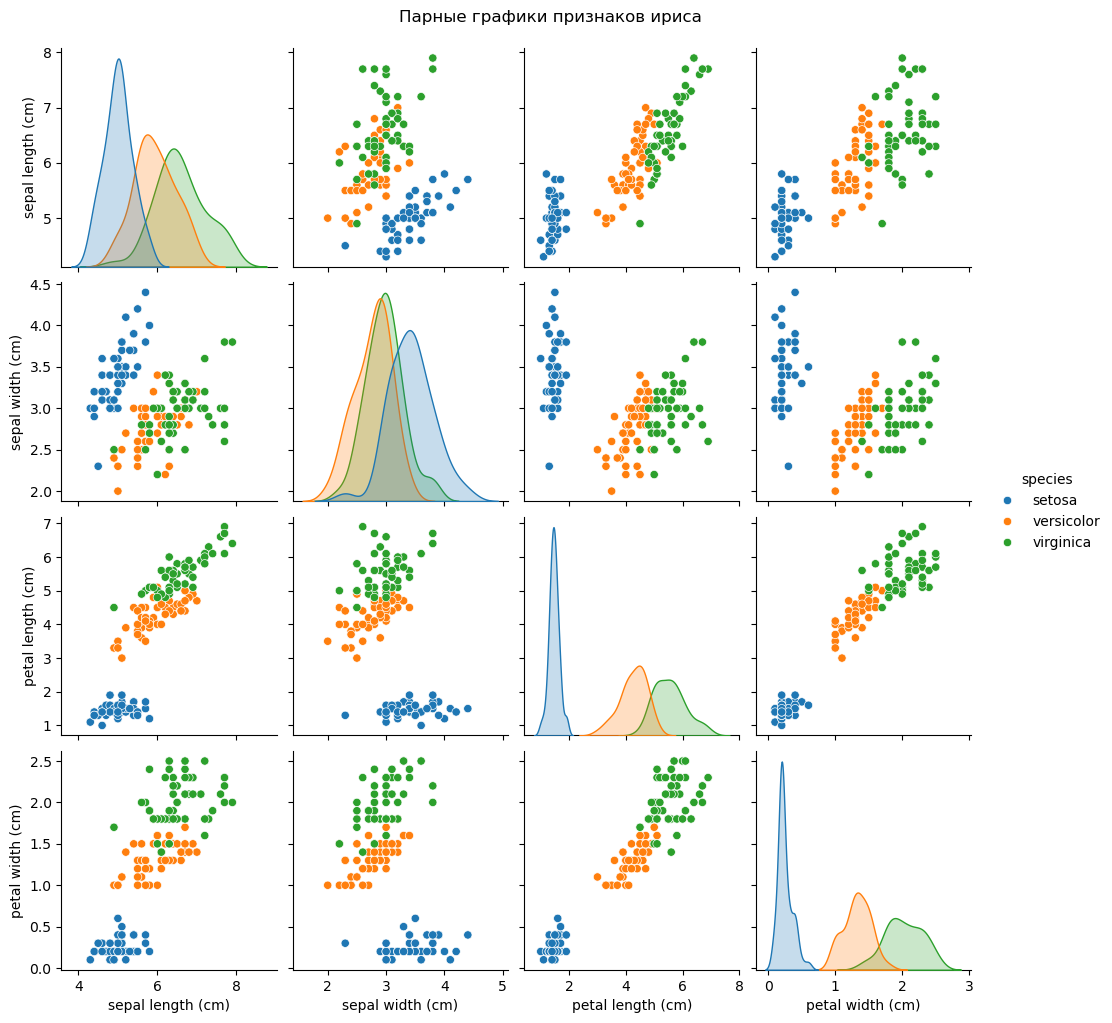

In [13]:
# Визуализация данных
plt.figure(figsize=(12, 10))
sns.pairplot(df, hue='species')
plt.suptitle("Парные графики признаков ириса", y=1.02)
plt.show()

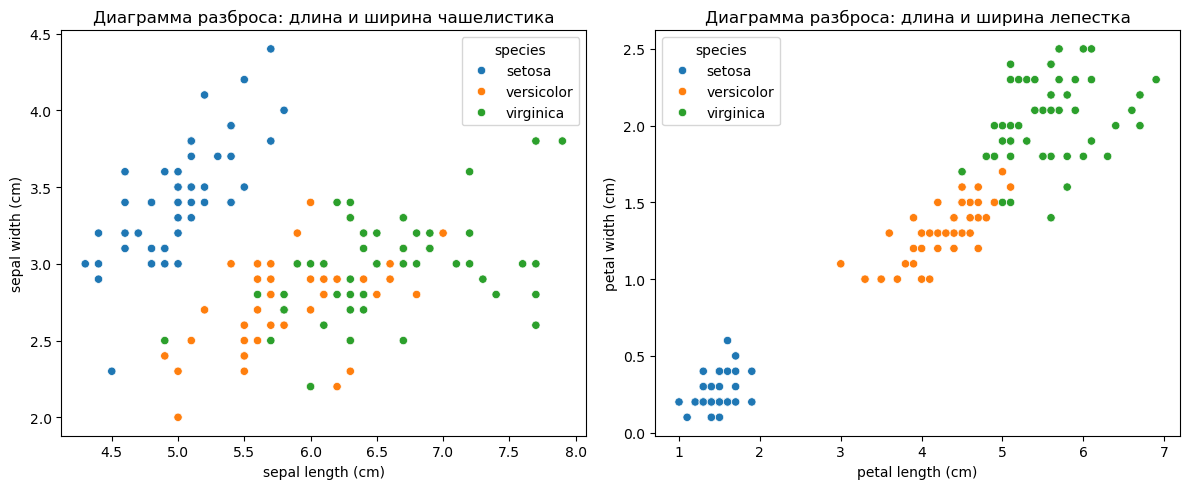

In [17]:
# Диаграммы разброса
plt.figure(figsize=(12, 5))
plt.subplot(121)
sns.scatterplot(data=df, x='sepal length (cm)', y='sepal width (cm)', hue='species')
plt.title("Диаграмма разброса: длина и ширина чашелистика")
plt.subplot(122)
sns.scatterplot(data=df, x='petal length (cm)', y='petal width (cm)', hue='species')
plt.title("Диаграмма разброса: длина и ширина лепестка")
plt.tight_layout()
plt.show()

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
# Функция для оценки модели
def evaluate_model(model, X_train, y_train, X_test, y_test):
    # Кросс-валидация
    cv_scores = cross_val_score(model, X_train, y_train, cv=5)
    print(f"Средняя точность кросс-валидации: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")
    
    # Обучение на всей обучающей выборке
    model.fit(X_train, y_train)
    
    # Предсказания на тестовой выборке
    y_pred = model.predict(X_test)
    
    # Оценка качества
    print(f"Точность на тестовой выборке: {accuracy_score(y_test, y_pred):.4f}")
    print("\nОтчет о классификации:")
    print(classification_report(y_test, y_pred, target_names=iris.target_names))

In [23]:
# Матрица ошибок
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.title(f'Матрица ошибок - {model.__class__.__name__}')
plt.ylabel('Истинный класс')
plt.xlabel('Предсказанный класс')
plt.show()

NameError: name 'y_pred' is not defined

In [25]:
# Логистическая регрессия
log_reg = LogisticRegression(random_state=42)
print("Логистическая регрессия:")
evaluate_model(log_reg, X_train_scaled, y_train, X_test_scaled, y_test)

Логистическая регрессия:
Средняя точность кросс-валидации: 0.9429 (+/- 0.0713)
Точность на тестовой выборке: 1.0000

Отчет о классификации:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [27]:
# Дерево решений
dt = DecisionTreeClassifier(random_state=42)
print("\nДерево решений:")
evaluate_model(dt, X_train, y_train, X_test, y_test)


Дерево решений:
Средняя точность кросс-валидации: 0.9333 (+/- 0.0467)
Точность на тестовой выборке: 1.0000

Отчет о классификации:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [29]:
# Важность признаков для дерева решений
dt.fit(X_train, y_train)
feature_importance = pd.DataFrame({'feature': iris.feature_names, 'importance': dt.feature_importances_})
feature_importance = feature_importance.sort_values('importance', ascending=False)

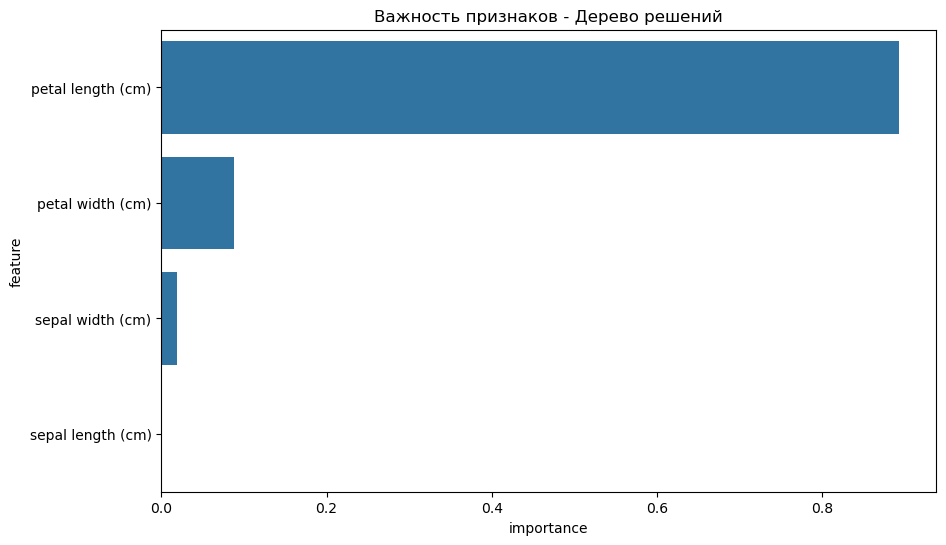

In [31]:
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Важность признаков - Дерево решений')
plt.show()

In [33]:
from sklearn.model_selection import GridSearchCV

In [35]:
# Подбор гиперпараметров для дерева решений
param_grid = {
    'max_depth': [3, 4, 5, 6, 7],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2, 3]
}

dt_grid = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5)
dt_grid.fit(X_train, y_train)

print("Лучшие параметры:", dt_grid.best_params_)
print("Лучшая оценка кросс-валидации:", dt_grid.best_score_)

Лучшие параметры: {'max_depth': 4, 'min_samples_leaf': 3, 'min_samples_split': 2}
Лучшая оценка кросс-валидации: 0.9428571428571428


In [37]:
# Оценка лучшей модели
best_dt = dt_grid.best_estimator_
print("\nЛучшая модель дерева решений:")
evaluate_model(best_dt, X_train, y_train, X_test, y_test)


Лучшая модель дерева решений:
Средняя точность кросс-валидации: 0.9429 (+/- 0.1111)
Точность на тестовой выборке: 1.0000

Отчет о классификации:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [39]:
# Сравнение с логистической регрессией
print("\nЛогистическая регрессия (для сравнения):")
evaluate_model(log_reg, X_train_scaled, y_train, X_test_scaled, y_test)


Логистическая регрессия (для сравнения):
Средняя точность кросс-валидации: 0.9429 (+/- 0.0713)
Точность на тестовой выборке: 1.0000

Отчет о классификации:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



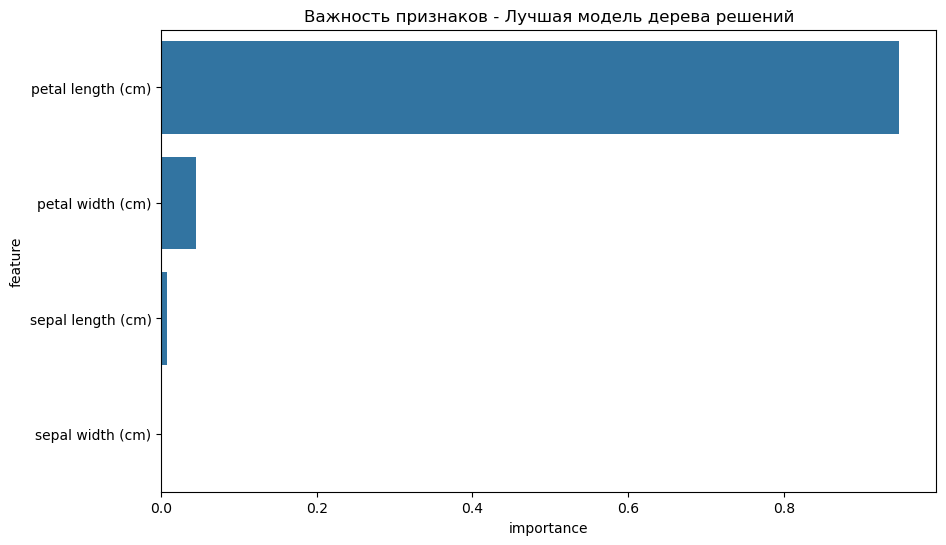

In [41]:
# Важность признаков для лучшей модели дерева решений
feature_importance = pd.DataFrame({'feature': iris.feature_names, 'importance': best_dt.feature_importances_})
feature_importance = feature_importance.sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Важность признаков - Лучшая модель дерева решений')
plt.show()